In [42]:
import numpy as np
import pandas as pd
import pandas
import matplotlib.pyplot as plt
from pandas.core.nanops import nanmean as pd_nanmean


import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.filtertools import convolution_filter
import pickle


In [102]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import pandas as pd
from statsmodels.tsa import arima_process
import matplotlib.pyplot as plt

from statsmodels.datasets import nile
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt


import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 


%matplotlib inline
from pylab import rcParams
from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [3]:
def _extrapolate_trend(trend, npoints):
    """
    Replace nan values on trend's end-points with least-squares extrapolated
    values with regression considering npoints closest defined points.
    """
    front = next(i for i, vals in enumerate(trend)
                 if not np.any(np.isnan(vals)))
    back = trend.shape[0] - 1 - next(i for i, vals in enumerate(trend[::-1])
                                     if not np.any(np.isnan(vals)))
    front_last = min(front + npoints, back)
    back_first = max(front, back - npoints)

    k, n = np.linalg.lstsq(
        np.c_[np.arange(front, front_last), np.ones(front_last - front)],
        trend[front:front_last], rcond=-1)[0]
    extra = (np.arange(0, front) * np.c_[k] + np.c_[n]).T
    if trend.ndim == 1:
        extra = extra.squeeze()
    trend[:front] = extra

    k, n = np.linalg.lstsq(
        np.c_[np.arange(back_first, back), np.ones(back - back_first)],
        trend[back_first:back], rcond=-1)[0]
    extra = (np.arange(back + 1, trend.shape[0]) * np.c_[k] + np.c_[n]).T
    if trend.ndim == 1:
        extra = extra.squeeze()
    trend[back + 1:] = extra

    return trend

# Example time series

### Yahoo Stock Price

In [4]:
df = pd.read_csv('yahoo_stock.csv')

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [6]:
df.tail(5)

,Date,High,Low,Open,Close,Volume,Adj Close
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
1824,2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [53]:
stock=  pd.read_csv('yahoo_stock.csv')

In [54]:
stock.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [55]:
stock1 = pd.read_csv('yahoo_stock.csv', index_col = 'Date', parse_dates =['Date'])
stock1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


In [56]:
stock1 = stock1.iloc[1:]
stock1 = stock1.fillna(method = 'ffill')
stock1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
2015-11-28,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


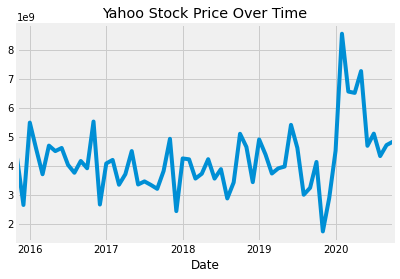

In [58]:
# asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
stock1['Volume'].asfreq('M').plot()
plt.title('Yahoo Stock Price Over Time')
plt.show()

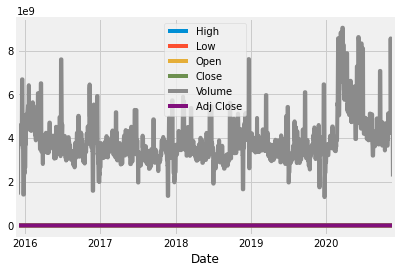

In [59]:
stock1['2015': '2020'].plot()

plt.savefig('Yahoo_price.png')

<AxesSubplot:xlabel='Date'>

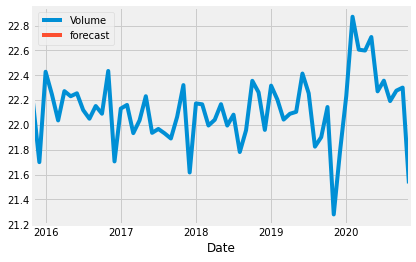

In [172]:
df = np.log(df) # don't forget to transform the data back when making real predictions

df.plot()

<Figure size 720x288 with 0 Axes>

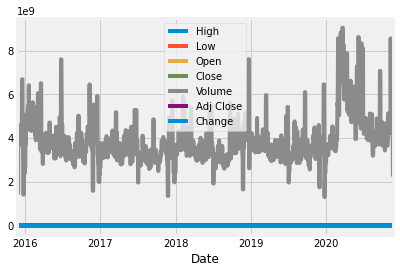

In [171]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 4))

stock1['2015': '2020'].plot()



plt.savefig('Yahoo_price.png', dpi=fig.dpi, bbox_inches='tight', pad_inches=1)

In [60]:
# Creating a Timestamp
timestamp = pd.Timestamp(2015, 1, 1, 12)
timestamp

Timestamp('2015-01-01 12:00:00')

In [61]:
# Creating a period
period = pd.Period('2015-01-01')
period

Period('2015-01-01', 'D')

In [62]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [63]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2015-01-01 00:00:00')

In [64]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/15', end='31/12/20')
dr1

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=2192, freq='D')

In [65]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/2015', end='31/12/2020', freq='M')
dr2

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
      

In [66]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='31/12/2020', periods=8)
dr3

DatetimeIndex(['2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
               '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='D')

In [67]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2015', end='2020', periods=140)
dr4

DatetimeIndex([          '2015-01-01 00:00:00',
               '2015-01-14 03:16:50.071942446',
               '2015-01-27 06:33:40.143884892',
               '2015-02-09 09:50:30.215827338',
               '2015-02-22 13:07:20.287769784',
               '2015-03-07 16:24:10.359712230',
               '2015-03-20 19:41:00.431654676',
               '2015-04-02 22:57:50.503597122',
               '2015-04-16 02:14:40.575539568',
               '2015-04-29 05:31:30.647482014',
               ...
               '2019-09-04 18:28:29.352517984',
               '2019-09-17 21:45:19.424460416',
               '2019-10-01 01:02:09.496402880',
               '2019-10-14 04:18:59.568345312',
               '2019-10-27 07:35:49.640287776',
               '2019-11-09 10:52:39.712230208',
               '2019-11-22 14:09:29.784172672',
               '2019-12-05 17:26:19.856115104',
               '2019-12-18 20:43:09.928057536',
                         '2020-01-01 00:00:00'],
              dtype=

# RESAMPLING

In [68]:
stock1 .shape

(1824, 6)

In [69]:
#downsampling to less observations
stock2 = stock1.resample('M').ffill()
stock2.head()
stock2.shape
stock2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2.655330e+09,2043.939941
2016-01-31,1940.239990,1894.000000,1894.000000,1940.239990,5.497570e+09,1940.239990
2016-02-29,1958.270020,1931.810059,1947.130005,1932.229980,4.588180e+09,1932.229980
2016-03-31,2067.919922,2057.459961,2063.770020,2059.739990,3.715280e+09,2059.739990


In [111]:
stock2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-31,3272.169922,3220.260010,3270.449951,3271.120117,5.117260e+09,3271.120117
2020-08-31,3514.770020,3493.250000,3509.729980,3500.310059,4.342290e+09,3500.310059
2020-09-30,3393.560059,3340.469971,3341.209961,3363.000000,4.722530e+09,3363.000000
2020-10-31,3304.929932,3233.939941,3293.590088,3269.959961,4.840450e+09,3269.959961
2020-11-30,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


In [71]:
#upsampling to more observations
stock3 = stock2.resample('D').ffill()
stock3.head(100)
stock3.shape

(1828, 6)

# Statistics

<AxesSubplot:xlabel='Date'>

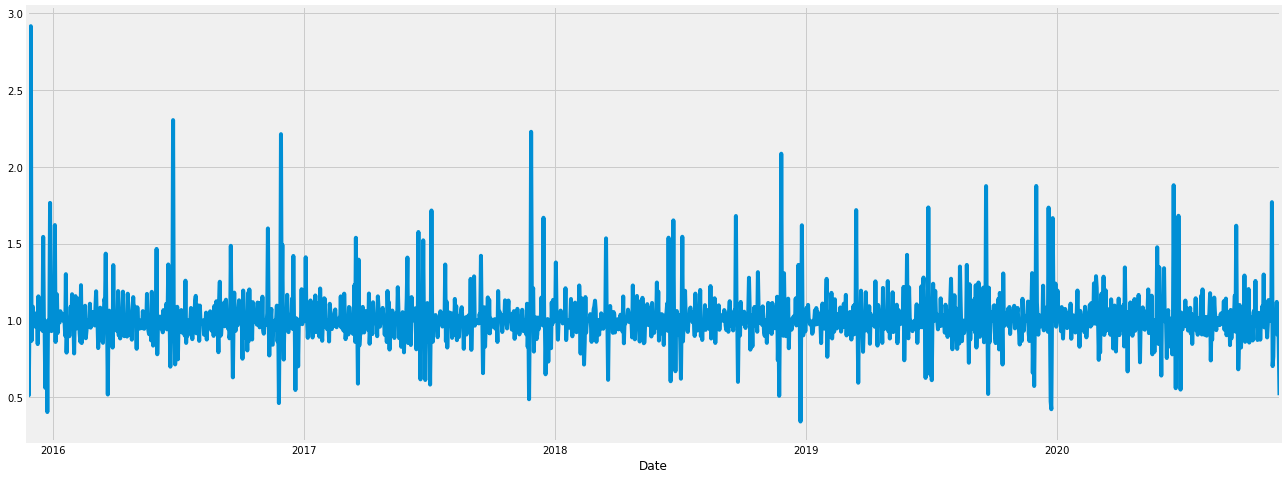

In [74]:
# Percent Change
stock1['Change'] = stock1.Volume.div(stock1.Volume.shift())
stock1['Change'].plot(figsize=(20,8))

# Window Functions

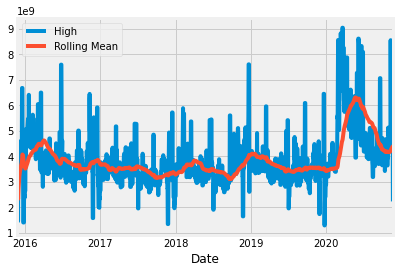

In [77]:
# Rolling window functions
rolling_stock = stock1.Volume.rolling('90D').mean()
stock1.Volume.plot()
rolling_stock.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of google stocks
plt.show()

# Autocorrelation and Partial Autocorrelation

In [78]:
stock2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2.655330e+09,2043.939941
2016-01-31,1940.239990,1894.000000,1894.000000,1940.239990,5.497570e+09,1940.239990
2016-02-29,1958.270020,1931.810059,1947.130005,1932.229980,4.588180e+09,1932.229980
2016-03-31,2067.919922,2057.459961,2063.770020,2059.739990,3.715280e+09,2059.739990


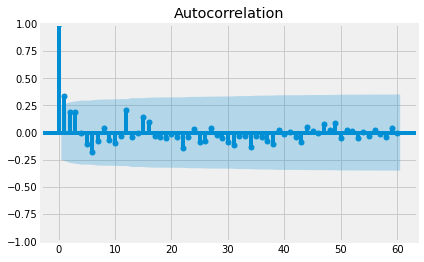

In [81]:
# remains above unil 45 lags or so
plot_acf(stock2['Volume'], lags = 60)
plt.show()

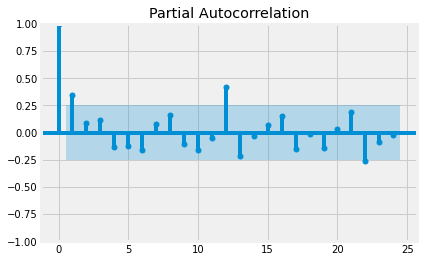

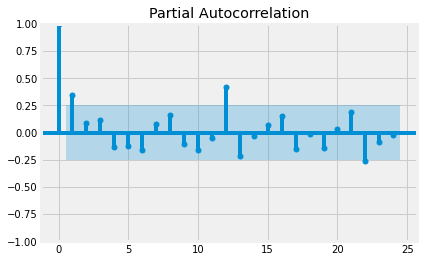

In [92]:
# partial acf after 2 lags is very low...except for 22 and 36
plot_pacf(stock2['Volume'], lags = 24)

#  Trends, Seasonality and Noise

Text(0.5, 1.0, 'Yahoo Price over Time')

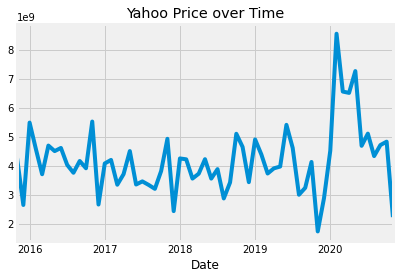

In [93]:
stock2['Volume'].plot()
plt.title('Yahoo Price over Time')

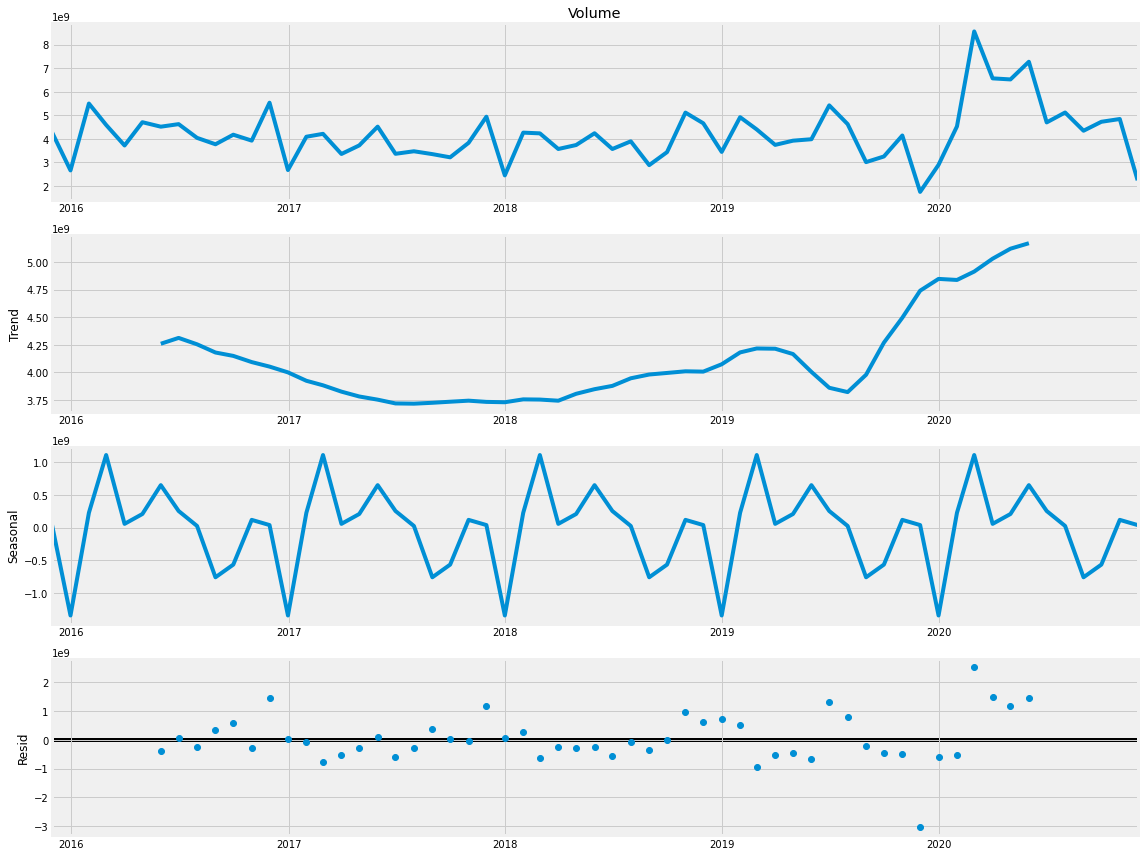

In [94]:
rcParams['figure.figsize'] =16, 12
decomposed_yahoo_price = sm.tsa.seasonal_decompose(stock2['Volume'], period = 12)  #frequency is monthly
figure = decomposed_yahoo_price.plot()

# White Noise

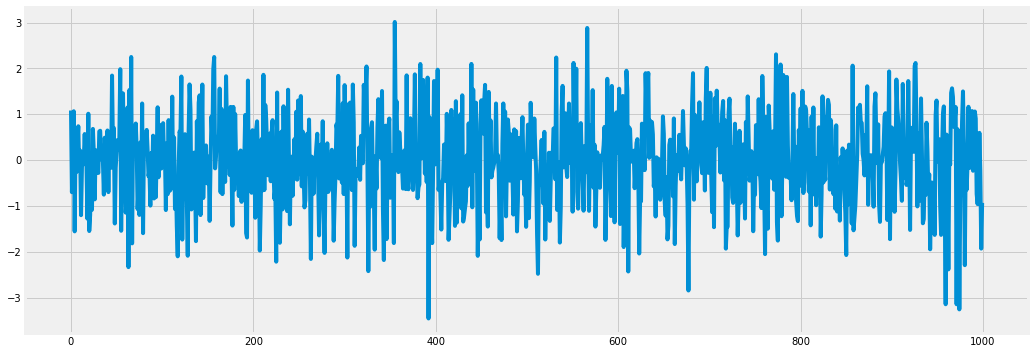

In [95]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

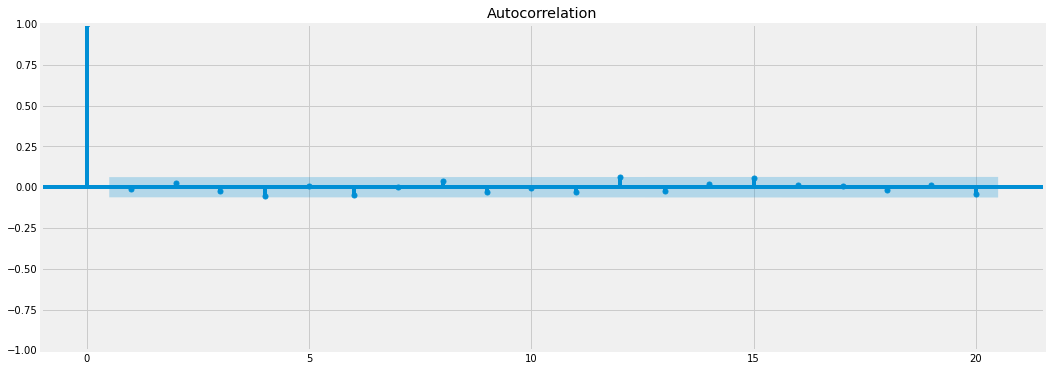

In [96]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

# Augmented Dickey-Fuller test

In [97]:
adf = adfuller(stock2['Volume'])
print("p-value of stocks: {}".format(float(adf[1])))

p-value of stocks: 0.808685501922571


* pvalue is more than .05...therefore null hypothesis is not rejected...therefore it is not stationary.

# Stationarity

<AxesSubplot:xlabel='Date'>

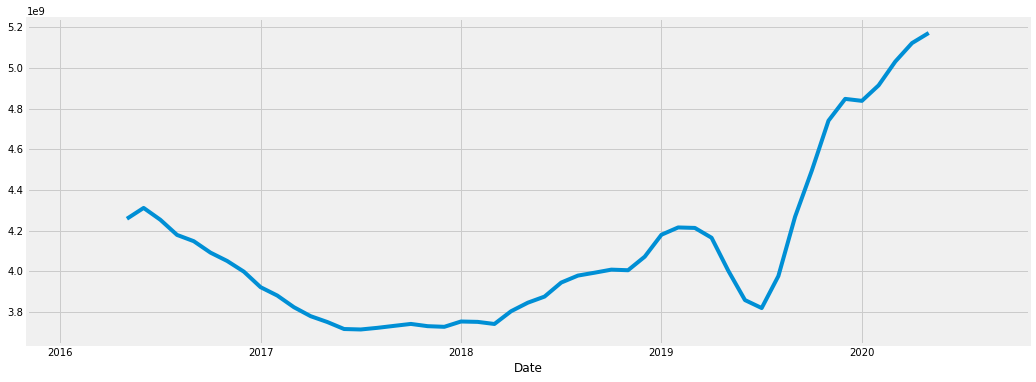

In [99]:
# The original non-stationary plot
decomposed_yahoo_price.trend.plot()

<AxesSubplot:xlabel='Date'>

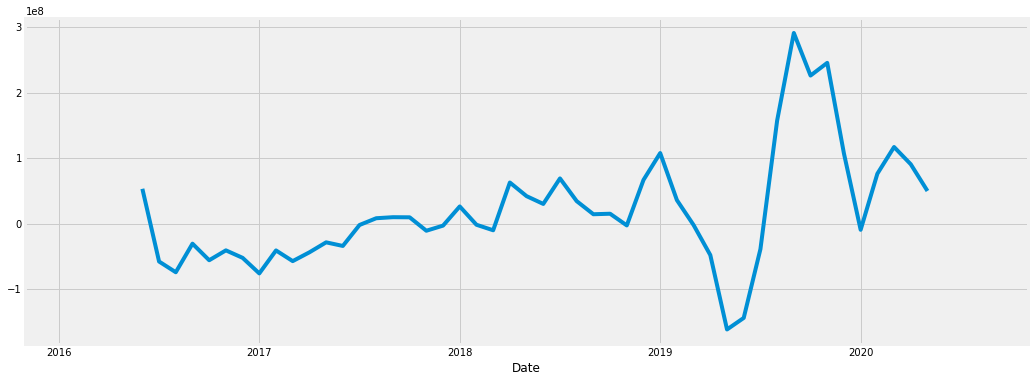

In [100]:
# The new stationary plot
decomposed_yahoo_price.trend.diff().plot()

In [106]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
# predicting stock price using ARIMA
price = ARIMA(stock2['Volume'].diff().iloc[1:].values, order = (1,0,0)).fit()
print(price.summary())
# plot_predict(price, start =700, end = 1000)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1340.151
Date:                Mon, 19 Jun 2023   AIC                           2686.303
Time:                        11:23:42   BIC                           2692.586
Sample:                             0   HQIC                          2688.761
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.397e+07   6.82e-11  -4.98e+17      0.000    -3.4e+07    -3.4e+07
ar.L1         -0.3777      0.127     -2.982      0.003      -0.626      -0.129
sigma2      1.458e+18   4.27e-20   3.41e+37      0.0

# Create a forcasting time series plot using a Seasonal ARIMA model

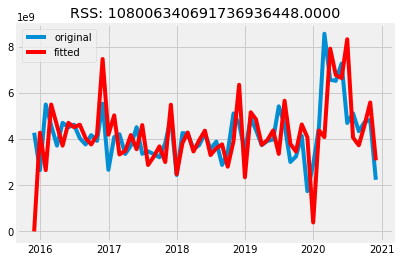

In [107]:
model = SARIMAX(stock2['Volume'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results_ARIMA = model.fit(disp=-1) 
plt.plot(stock2['Volume'], label='original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='fitted')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-stock2['Volume'])**2))
plt.legend()

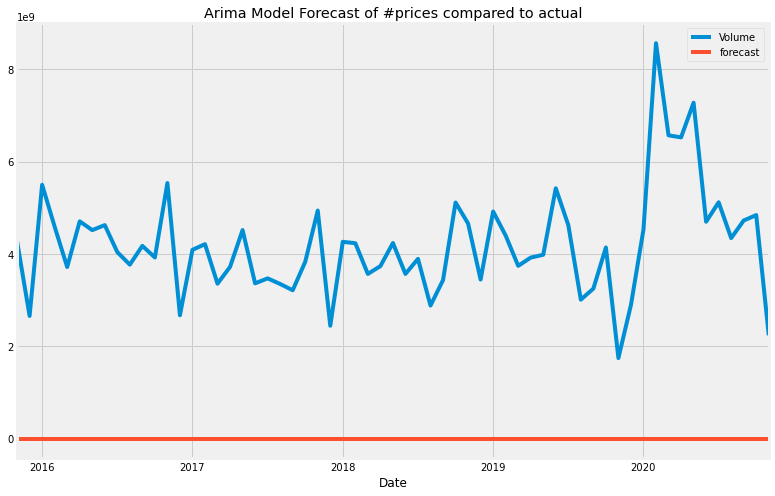

In [112]:
#convert our data series back into a dataframe
df = pd.DataFrame(stock2['Volume'])
# Add a forecast column to the dataframe that includes our predictions from the model
df['forecast'] = results_ARIMA.predict(start = '2015-11-30', end= '2020-11-30', dynamic= True)
# Plot the Dataframe data 
df[['Volume', 'forecast']].plot(figsize=(12, 8))
# Add a title
plt.title('Arima Model Forecast of #prices compared to actual')
# Show the plot
plt.show()

In [113]:
stock2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2.655330e+09,2043.939941
2016-01-31,1940.239990,1894.000000,1894.000000,1940.239990,5.497570e+09,1940.239990
2016-02-29,1958.270020,1931.810059,1947.130005,1932.229980,4.588180e+09,1932.229980
2016-03-31,2067.919922,2057.459961,2063.770020,2059.739990,3.715280e+09,2059.739990


# Keep only recent data

In [118]:
y_hist = df['2015':'2020']['Volume']
y_future = df['2021':'2025']['Volume']

h = len(y_hist)
f = len(y_future)

Text(0, 0.5, 'Volume of Stocks')

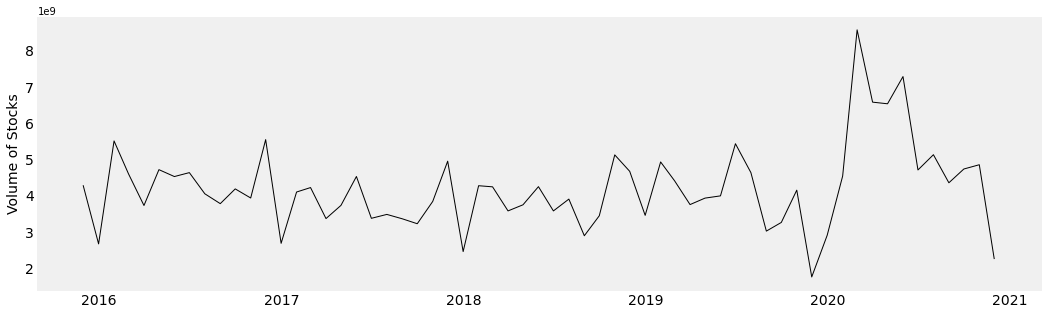

In [119]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',linewidth=1)
plt.plot(y_future,'k',linewidth=1,alpha=0.5)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)

In [123]:
y_hist = stock2.loc['2015':'2020', 'Volume']
y_future = stock2.loc['2021': '2025', 'Volume']
# gold3.drop(columns = 'Change', inplace = True)
stock2

,High,Low,Open,Close,Volume,Adj Close,forecast
Date,,,,,,,
2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912,NaN
2015-12-31,2062.540039,2043.619995,2060.590088,2043.939941,2.655330e+09,2043.939941,NaN
2016-01-31,1940.239990,1894.000000,1894.000000,1940.239990,5.497570e+09,1940.239990,NaN
2016-02-29,1958.270020,1931.810059,1947.130005,1932.229980,4.588180e+09,1932.229980,NaN
2016-03-31,2067.919922,2057.459961,2063.770020,2059.739990,3.715280e+09,2059.739990,NaN
...,...,...,...,...,...,...,...
2020-07-31,3272.169922,3220.260010,3270.449951,3271.120117,5.117260e+09,3271.120117,NaN
2020-08-31,3514.770020,3493.250000,3509.729980,3500.310059,4.342290e+09,3500.310059,NaN
2020-09-30,3393.560059,3340.469971,3341.209961,3363.000000,4.722530e+09,3363.000000,NaN


In [133]:
# Add a forecast column to the dataframe that includes our predictions from the model
stock2['forecast'] = results_ARIMA.predict(start = '2016', end= '2025', dynamic= True)
stock2.head()
stock2_forecast = stock2.loc['2016': '2025']
stock2_forecast.head()

,High,Low,Open,Close,Volume,Adj Close,forecast
Date,,,,,,,
2016-01-31,1940.239990,1894.000000,1894.000000,1940.239990,5.497570e+09,1940.239990,2.655330e+09
2016-02-29,1958.270020,1931.810059,1947.130005,1932.229980,4.588180e+09,1932.229980,2.655330e+09
2016-03-31,2067.919922,2057.459961,2063.770020,2059.739990,3.715280e+09,2059.739990,2.655330e+09
2016-04-30,2073.850098,2052.280029,2071.820068,2065.300049,4.704720e+09,2065.300049,2.655330e+09
2016-05-31,2103.479980,2088.659912,2100.129883,2096.949951,4.514410e+09,2096.949951,2.655330e+09


<AxesSubplot:xlabel='Date'>

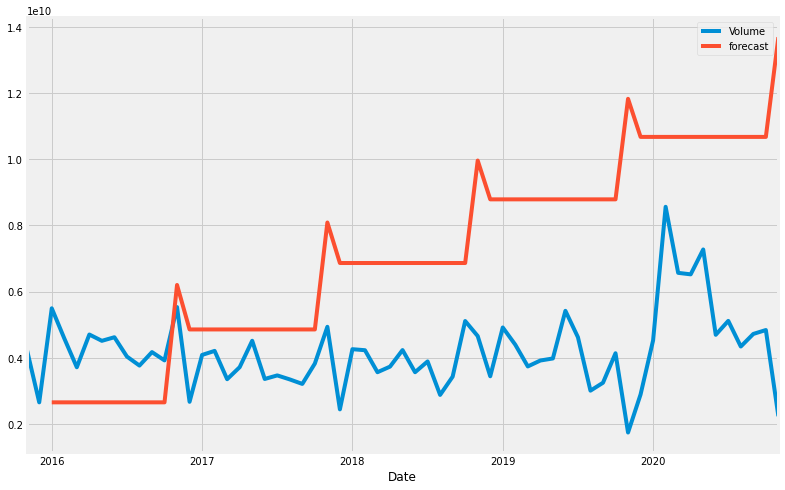

In [134]:
# Plot the Dataframe data 
stock2[['Volume', 'forecast']].plot(figsize=(12, 8))

# Trend

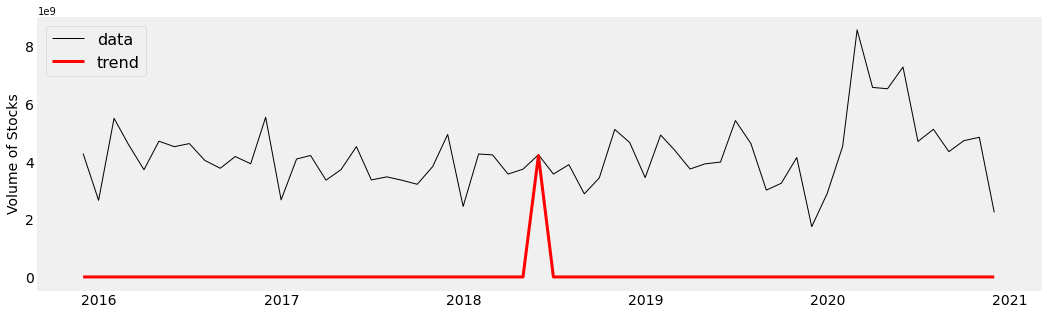

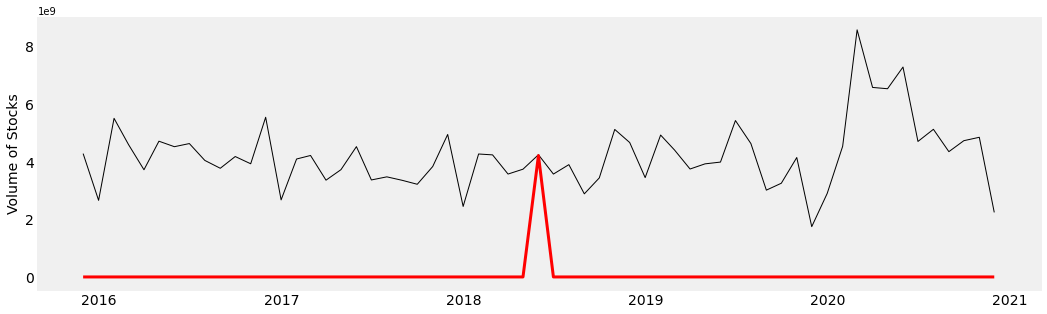

In [121]:
period = 60
filt = np.array([.5] + [1] * (period - 1) + [.5]) / period

nsides = 2
trend = convolution_filter(y_hist, filt, nsides)
trend = _extrapolate_trend(trend, period + 1)

period = None  # ensure we do not use this period

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.legend(loc='upper left',fontsize=16,framealpha=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

## Find the period of the data

Text(0, 0.5, 'Volume of Stocks')

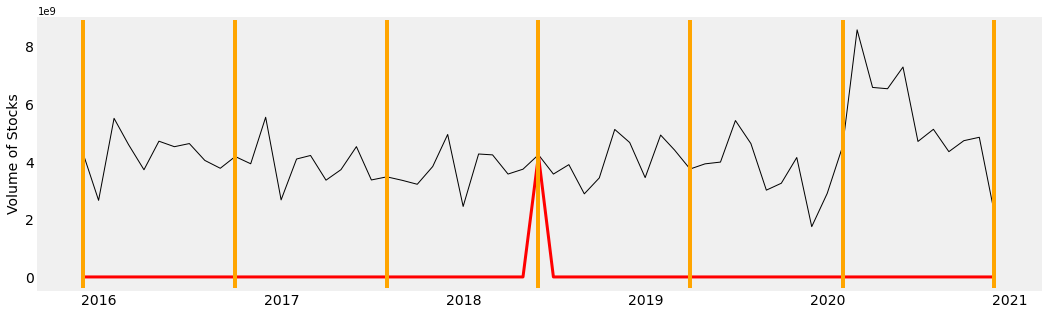

In [138]:
lows_index = [0,10,20,30,40,50,60]
lows = y_hist.index[lows_index]

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
for low in lows:
    plt.axvline(x=pd.to_datetime(low),color='orange')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)

In [139]:
detrended = y_hist - trend
detrended = detrended.to_numpy()
period = int(np.round(np.mean(np.diff(lows_index))))
num_hist_periods = len(lows)-1

period, num_hist_periods

(10, 6)

# divide into seasons

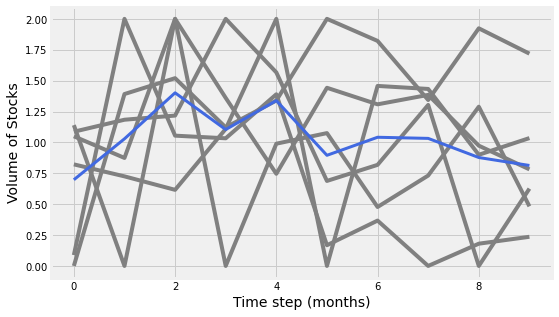

In [141]:
seasonals = np.empty((period,num_hist_periods))
for p in range(num_hist_periods):
    s = detrended[lows_index[p]:lows_index[p]+period]
    s = 2*(s-np.min(s))/(np.max(s)-np.min(s))
    seasonals[:,p] = s
    
mean_seasonals = seasonals.mean(axis=1)
    
plt.figure(figsize=(8,5))
for p in range(num_hist_periods):
    plt.plot(seasonals[:,p],color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3,label='mean seasonal')
plt.xlabel('Time step (months)',fontsize=14)
plt.xlabel('Time step (months)',fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

# smooth the seasonals

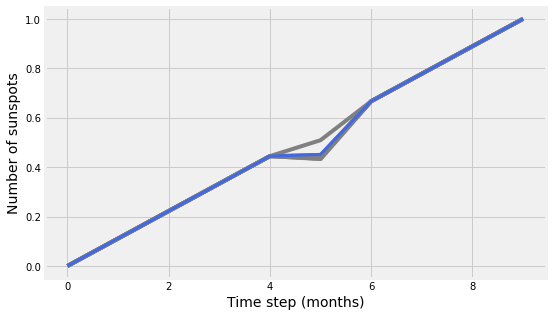

In [142]:
nsides = 2
filt_size = 9
filt = np.repeat(1.0 / filt_size, filt_size)

seasonals = np.empty((period,num_hist_periods))
for p in range(num_hist_periods):
    s = detrended[lows_index[p]:lows_index[p]+period]
    s = convolution_filter(s, filt, nsides)
    s = _extrapolate_trend(s, filt_size)
    s = (s-np.min(s))/(np.max(s)-np.min(s))
    seasonals[:,p] = s
    
mean_seasonals = seasonals.mean(axis=1)

plt.figure(figsize=(8,5))
for p in range(num_hist_periods):
    plt.plot(seasonals[:,p],color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3,label='mean seasonal')
plt.xlabel('Time step (months)',fontsize=14)
plt.xlabel('Time step (months)',fontsize=14)
plt.ylabel('Number of sunspots',fontsize=14)
plt.show()

## remove outliers

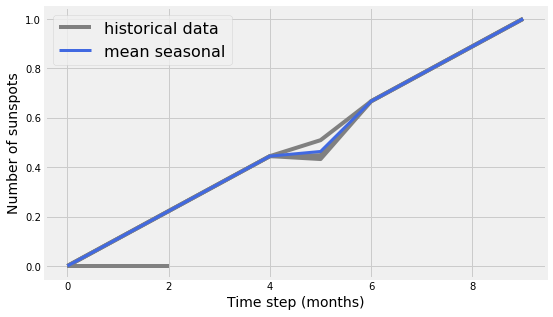

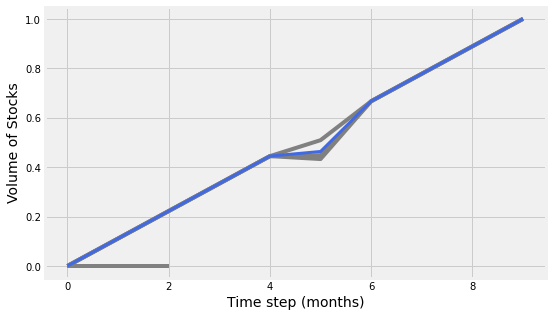

In [143]:
# plt.figure()
# for p in range(num_hist_periods):
#     plt.plot(seasonals[:,p],label=p)
# plt.legend()
# plt.xlabel('Time step (months)',fontsize=14)
# plt.xlabel('Time step (months)',fontsize=14)
# plt.ylabel('Volume of Stocks',fontsize=14)
# plt.show()

# remove outliers
seasonals = seasonals[:,[2,3,4]]
mean_seasonals = seasonals.mean(axis=1)

plt.figure(figsize=(8,5))
plt.plot(seasonals[0],color=0.5*np.ones(3),label='historical data')
plt.plot(seasonals,color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3,label='mean seasonal')
plt.xlabel('Time step (months)',fontsize=14)
plt.xlabel('Time step (months)',fontsize=14)
plt.ylabel('Number of sunspots',fontsize=14)
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(seasonals[0],color=0.5*np.ones(3),label='historical data')
plt.plot(seasonals,color=0.5*np.ones(3))
plt.plot(mean_seasonals,color='royalblue',linewidth=3,label='mean seasonal')
plt.xlabel('Time step (months)',fontsize=14)
plt.xlabel('Time step (months)',fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

### construct seasonal

Text(0, 0.5, 'Volume of Stocks')

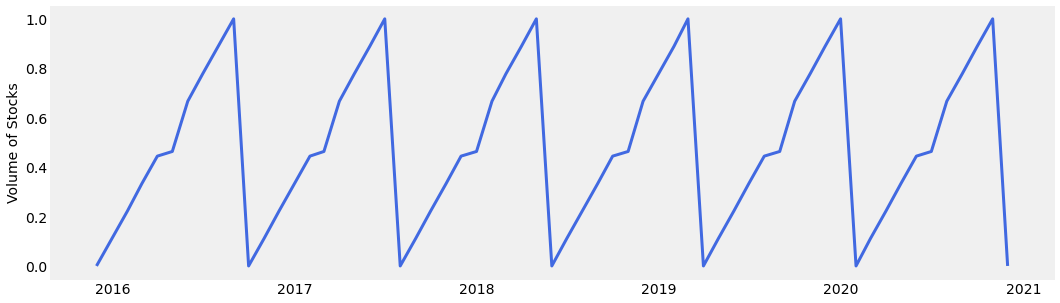

In [144]:
seasonal = pd.Series(index=y_hist.index,data=0)

for low in lows_index:
    if low+period<len(seasonal):
        seasonal[low:low+period] = mean_seasonals
    else:
        seasonal[low:] = mean_seasonals[:len(seasonal)-(low+period)]
        
        
seasonal = seasonal / np.max(seasonal)
    
plt.figure(figsize=(16,5))
plt.plot(seasonal,label='trend+seasonal',color='royalblue',linewidth=3)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)

In [145]:
season_and_trend = 2*trend*seasonal

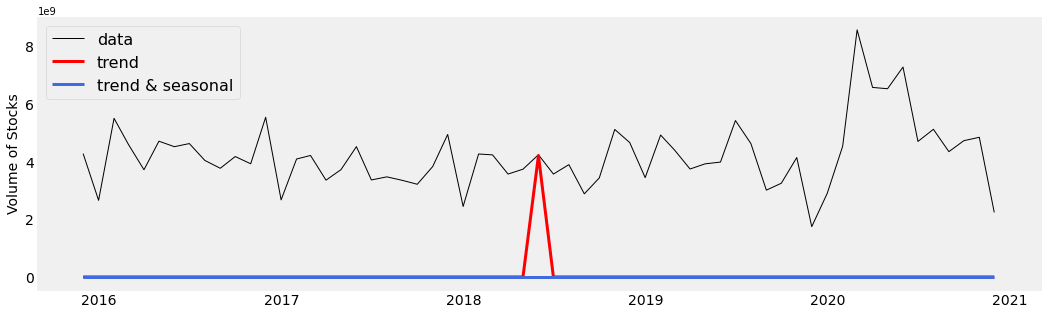

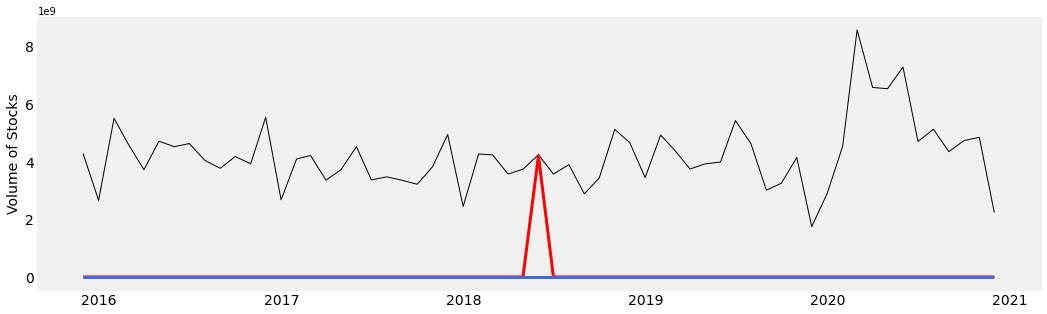

In [146]:
plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='trend & seasonal',color='royalblue',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.legend(loc='upper left',fontsize=16,framealpha=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='trend & seasonal',color='royalblue',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

# model residue

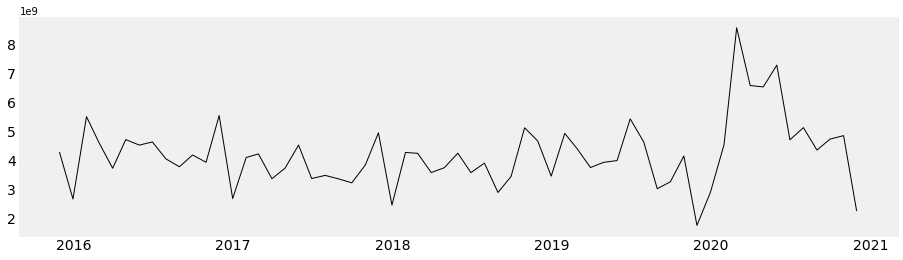

In [147]:
residue = y_hist - season_and_trend
plt.figure(figsize=(14,4))
plt.plot(residue,'k',linewidth=1,label='model residue')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Forecast trend

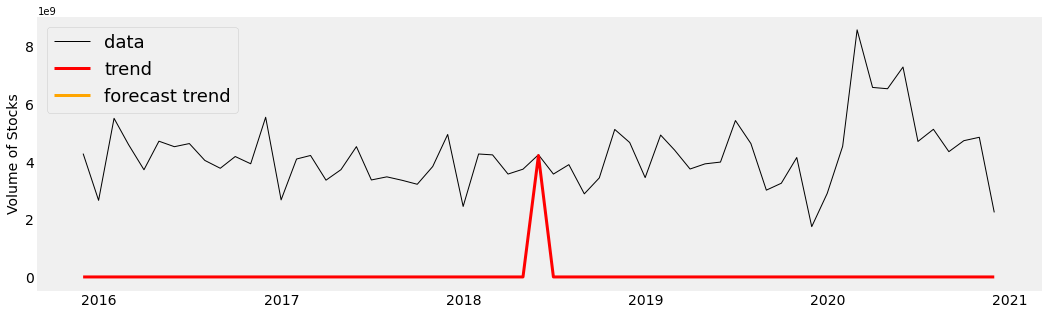

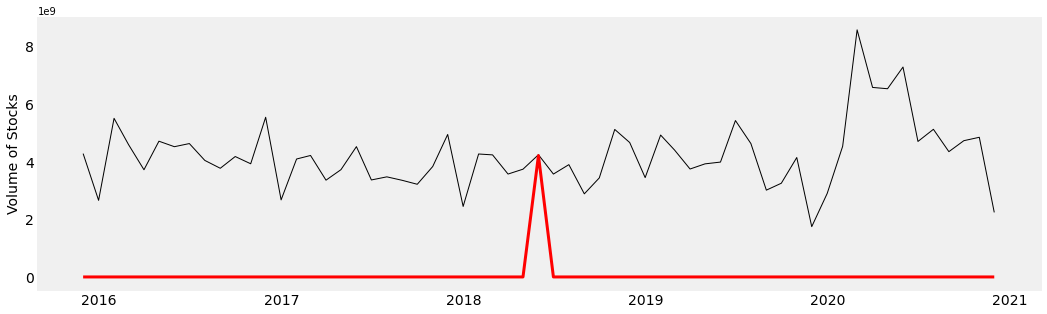

In [148]:
f_periods = int(1 + f/period)
yhat_trend = pd.Series(index=y_future.index, data=trend[-1])

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(yhat_trend,label='forecast trend',color='orange',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.legend(loc='upper left',fontsize=18,framealpha=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(yhat_trend,label='forecast trend',color='orange',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

### forecast

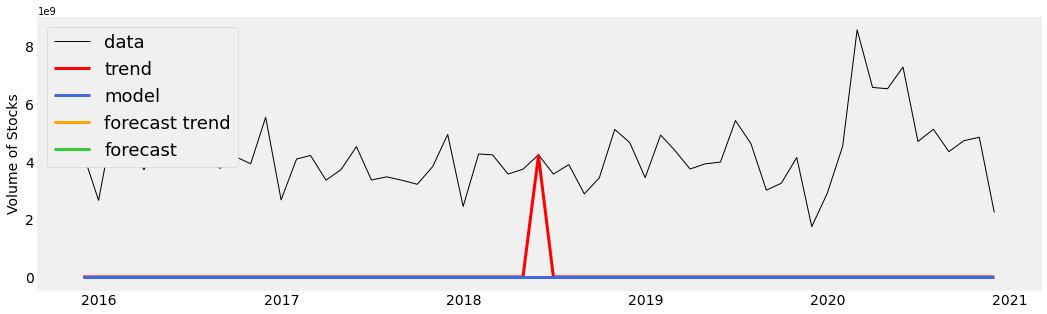

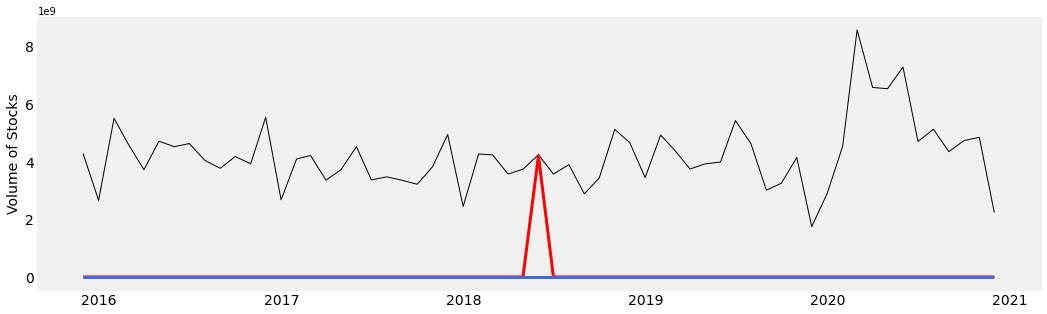

In [149]:
yhat_seasonal = pd.Series(index=y_future.index)
for i in range(len(yhat_seasonal)):
    yhat_seasonal[i] = seasonal[-(f_periods*len(mean_seasonals)-i)]
yhat = 2*yhat_trend*yhat_seasonal

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='model',color='royalblue',linewidth=3)
plt.plot(yhat_trend,label='forecast trend',color='orange',linewidth=3)
plt.plot(yhat,label='forecast',color='limegreen',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.legend(loc='upper left',fontsize=18,framealpha=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

plt.figure(figsize=(16,5))
plt.plot(y_hist,'k',label='data',linewidth=1)
plt.plot(trend,label='trend',color='red',linewidth=3)
plt.plot(season_and_trend,label='model',color='royalblue',linewidth=3)
plt.plot(yhat_trend,label='forecast trend',color='orange',linewidth=3)
plt.plot(yhat,label='forecast',color='limegreen',linewidth=3)
plt.plot(y_future,'k',alpha=0.5,linewidth=1)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

### remainder, residue, error

In [153]:
pred_error = y_future - yhat

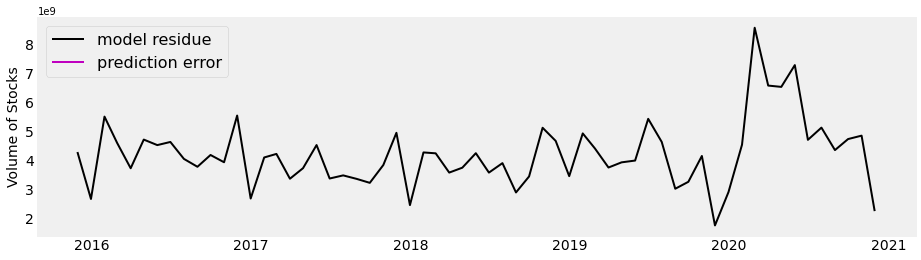

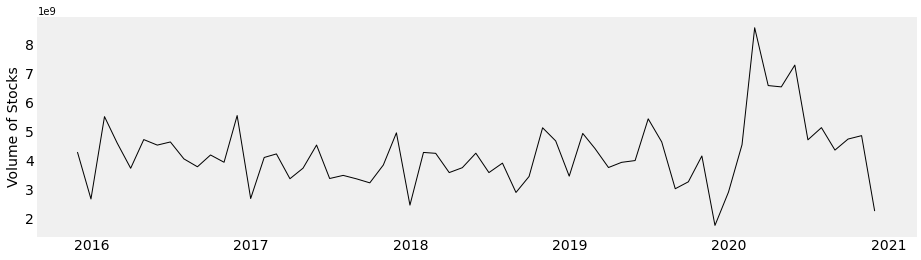

In [154]:
plt.figure(figsize=(14,4))
plt.plot(residue,'k',linewidth=2,label='model residue')
plt.plot(pred_error,'m',linewidth=2,label='prediction error')
plt.grid()
plt.legend(fontsize=16,framealpha=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

plt.figure(figsize=(14,4))
plt.plot(residue,'k',linewidth=1,label='model residue')
plt.plot(pred_error,'m',linewidth=1,label='prediction error')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Volume of Stocks',fontsize=14)
plt.show()

In [155]:
MAEm = np.abs(residue).mean()
RMSEm = np.sqrt( np.square(residue).mean() )
MAEm, RMSEm

(4190538720.163934, 4344442937.963943)

In [156]:
MAEp = np.abs(pred_error).mean()
RMSEp = np.sqrt( np.square(pred_error).mean() )
MAEp, RMSEp

(nan, nan)

# save

In [157]:
with open('decomp.pkl', 'wb') as file:
    pickle.dump( {'history': pd.DataFrame({'y_hist':y_hist,'t_and_s':season_and_trend,'ts_residue':residue}),
                  'future' : pd.DataFrame({'y_future':y_future,'yhat':yhat,'error':pred_error})} , file)